

---

## Web scraping and analysis



### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

#import the libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  ✅ Trip Verified |  Couldn’t book in online. Ar...
1  ✅ Trip Verified | London Heathrow to Mumbai in...
2  ✅ Trip Verified | Keflavík, Iceland to London ...
3  ✅ Trip Verified | Terrible Experience with Bri...
4  ✅ Trip Verified | An airline that lives in the...

In [4]:
directory='.csv'

In [5]:
df.to_csv("britishairways_reviews12.csv")

In [6]:
len(df)

1000

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified", "")
df["reviews"] = df["reviews"].str.replace("❌ Not Verified", "")
df["reviews"] = df["reviews"].str.replace("|", "")
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26484\1144794447.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["reviews"] = df["reviews"].str.replace("|", "")


reviews
0     Couldn’t book in online. Arrived at check i...
1    London Heathrow to Mumbai in a Boeing 787-8 ...
2    Keflavík, Iceland to London Heathrow on an A...
3    Terrible Experience with British Airways. I ...
4    An airline that lives in their past glory an...

In [8]:
len(df)

1000

#generating word cloud

In [9]:
from wordcloud import WordCloud

In [10]:
reviews_combined = " ".join(df.reviews.values)

In [11]:
reviews_combined 

'   Couldn’t book in online. Arrived at check in to find we had been bumped off due to overselling. No BA staff available. Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse. Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight. Airlines should be legally stopped from selling seats twice.   London Heathrow to Mumbai in a Boeing 787-8 in Business Class. The lounge near Terminal 5, Gate B36 at Heathrow was outstanding in its service and offerings. It provides us just the right frame to relax in before boarding as the departure was delayed by almost 2 hours. The 787-8 on our flight featured the older Club World seating. Not the best in class but comfortable enough. I hear that the new Club Suites configuration is far superior. British Airways onboard service was outstanding in every respect. All in all, a very comfortable flight. One minor irritant: for some reason this aircraft was not fitted with WiFi. We go

In [12]:
import re
reviews_combined = re.sub(r"\.",". ",reviews_combined)
reviews_combined = re.sub(r"[^\w\s]+"," ",reviews_combined)

In [13]:
reviews_combined

'   Couldn t book in online   Arrived at check in to find we had been bumped off due to overselling   No BA staff available   Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse   Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight   Airlines should be legally stopped from selling seats twice     London Heathrow to Mumbai in a Boeing 787 8 in Business Class   The lounge near Terminal 5  Gate B36 at Heathrow was outstanding in its service and offerings   It provides us just the right frame to relax in before boarding as the departure was delayed by almost 2 hours   The 787 8 on our flight featured the older Club World seating   Not the best in class but comfortable enough   I hear that the new Club Suites configuration is far superior   British Airways onboard service was outstanding in every respect   All in all  a very comfortable flight   One minor irritant  for some reason this aircraft was not fitted wi

In [14]:
#Total words in reviews
len(reviews_combined)

810567

In [15]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [16]:
import matplotlib.pyplot as plt

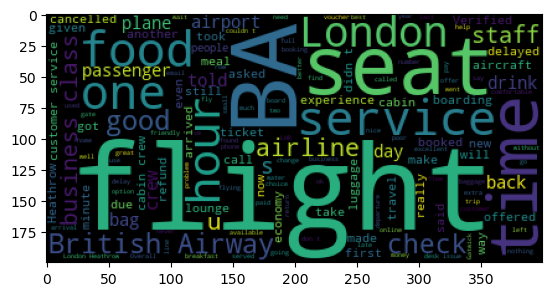

In [17]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [18]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=50,random_state = 46333, stopwords = None).\
generate_from_text(reviews_combined)

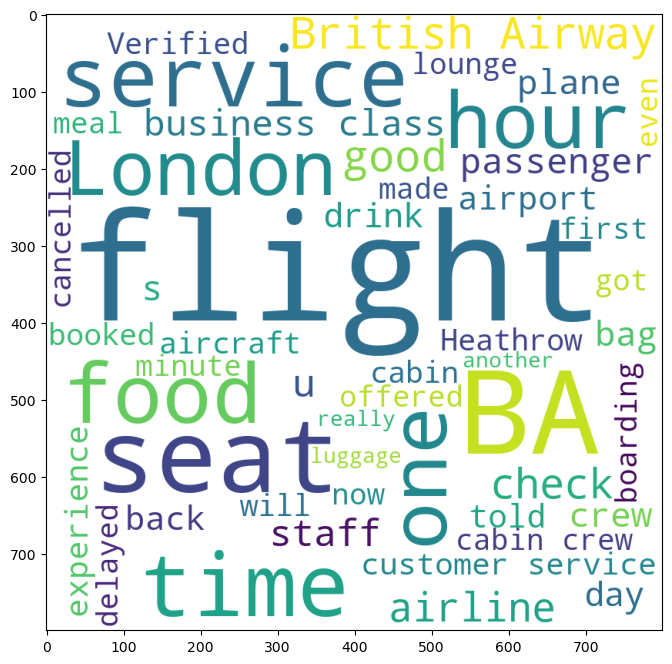

In [19]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [20]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [21]:
fdist["will"]

217

In [22]:
fdist["good"]

386

In [23]:
fdist["bad"]

83

In [24]:
print(all_terms)

['', '', '', 'Couldn', 't', 'book', 'in', 'online', '', '', 'Arrived', 'at', 'check', 'in', 'to', 'find', 'we', 'had', 'been', 'bumped', 'off', 'due', 'to', 'overselling', '', '', 'No', 'BA', 'staff', 'available', '', '', 'Very', 'helpful', 'Gatwick', 'staff', 'got', 'us', 'a', 'bus', 'to', 'LHR', 'and', 'a', 'flight', 'to', 'Toulouse', '', '', 'Had', 'knock', 'in', 'effect', 'on', 'our', 'car', 'booking', 'and', 'sharing', 'as', 'the', 'rest', 'of', 'family', 'had', 'been', 'able', 'yo', 'board', 'original', 'flight', '', '', 'Airlines', 'should', 'be', 'legally', 'stopped', 'from', 'selling', 'seats', 'twice', '', '', '', '', 'London', 'Heathrow', 'to', 'Mumbai', 'in', 'a', 'Boeing', '787', '8', 'in', 'Business', 'Class', '', '', 'The', 'lounge', 'near', 'Terminal', '5', '', 'Gate', 'B36', 'at', 'Heathrow', 'was', 'outstanding', 'in', 'its', 'service', 'and', 'offerings', '', '', 'It', 'provides', 'us', 'just', 'the', 'right', 'frame', 'to', 'relax', 'in', 'before', 'boarding', 'as',

In [25]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [26]:
df_dist.head(10)

words   freq
0           27332
1   Couldn      9
2        t    602
3     book     67
4       in   2024
5   online     92
6  Arrived     18
7       at    933
8    check    305
9       to   5189

<AxesSubplot:xlabel='words'>

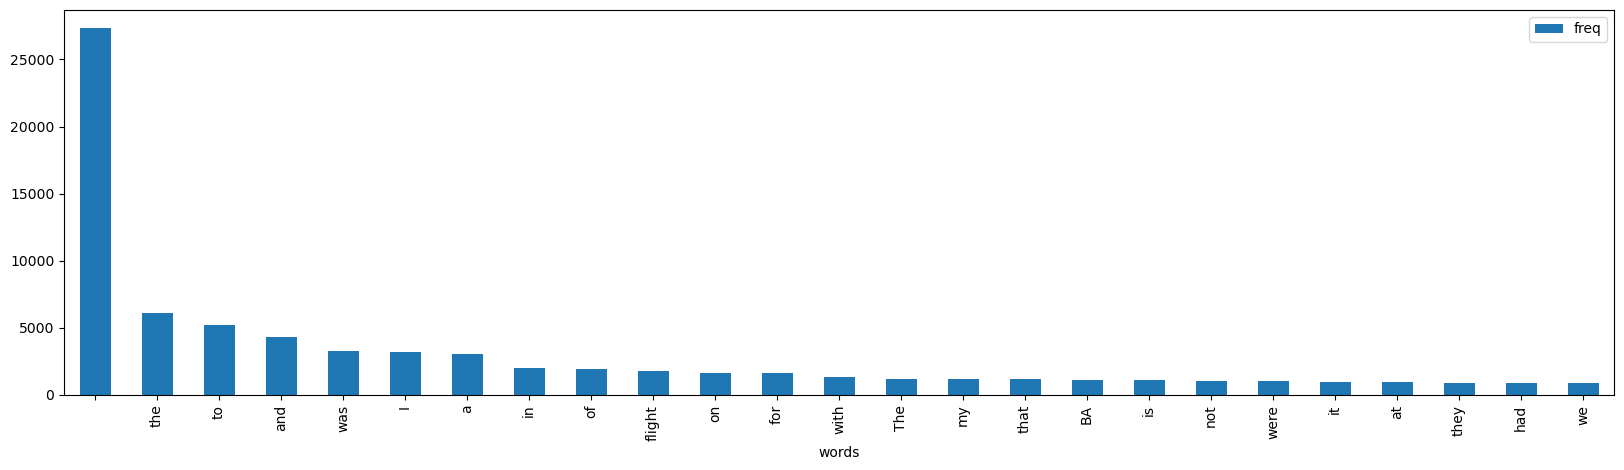

In [27]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals 1.case is non uniform 2. punctuations and stop words are present

In [28]:
#1. case normalization and tokenizing

In [29]:
df.reviews[:10]

0       Couldn’t book in online. Arrived at check i...
1      London Heathrow to Mumbai in a Boeing 787-8 ...
2      Keflavík, Iceland to London Heathrow on an A...
3      Terrible Experience with British Airways. I ...
4      An airline that lives in their past glory an...
5       Check-in Desk rude and dismissive. Flight l...
6      I chose British Airways especially because I...
7    Not Verified  I booked Premium Economy from IN...
8      A simple story with an unfortunate outcome t...
9       Flight was delayed due to the inbound fligh...
Name: reviews, dtype: object

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(reviews_combined.lower())

In [32]:
print(all_terms)

['couldn', 't', 'book', 'in', 'online', 'arrived', 'at', 'check', 'in', 'to', 'find', 'we', 'had', 'been', 'bumped', 'off', 'due', 'to', 'overselling', 'no', 'ba', 'staff', 'available', 'very', 'helpful', 'gatwick', 'staff', 'got', 'us', 'a', 'bus', 'to', 'lhr', 'and', 'a', 'flight', 'to', 'toulouse', 'had', 'knock', 'in', 'effect', 'on', 'our', 'car', 'booking', 'and', 'sharing', 'as', 'the', 'rest', 'of', 'family', 'had', 'been', 'able', 'yo', 'board', 'original', 'flight', 'airlines', 'should', 'be', 'legally', 'stopped', 'from', 'selling', 'seats', 'twice', 'london', 'heathrow', 'to', 'mumbai', 'in', 'a', 'boeing', '787', '8', 'in', 'business', 'class', 'the', 'lounge', 'near', 'terminal', '5', 'gate', 'b36', 'at', 'heathrow', 'was', 'outstanding', 'in', 'its', 'service', 'and', 'offerings', 'it', 'provides', 'us', 'just', 'the', 'right', 'frame', 'to', 'relax', 'in', 'before', 'boarding', 'as', 'the', 'departure', 'was', 'delayed', 'by', 'almost', '2', 'hours', 'the', '787', '8', 

In [33]:
len(all_terms)

147087

In [34]:
len(set(all_terms))

7623

In [35]:
#visualizing the frequency distribution

In [36]:
from nltk.probability import FreqDist

In [37]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'the': 7250, 'to': 5216, 'and': 4360, 'was': 3272, 'i': 3243, 'a': 3157, 'in': 2098, 'of': 1959, 'flight': 1856, 'on': 1819, ...})

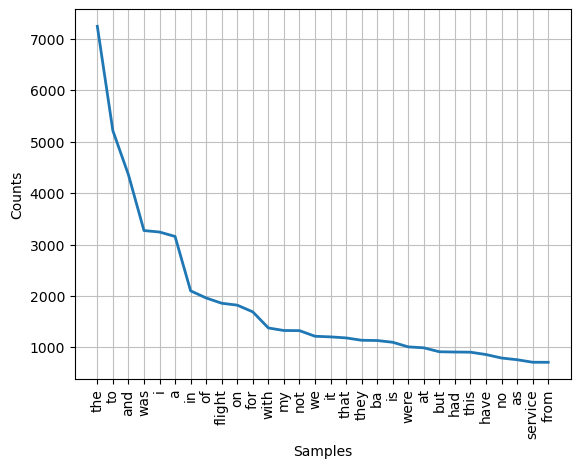

In [38]:
fdist.plot(30,cumulative=False)
plt.show()

In [39]:
from string import punctuation
from nltk.corpus import stopwords

In [40]:
stop_nltk = stopwords.words("english")

In [41]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
import re
def clean_text(text):
    # Remove special characters and symbols (keep only alphabets, numbers, and spaces)
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    # Convert to lowercase
    cleaned_text = cleaned_text.lower()

    return cleaned_text

# Clean the reviews using the clean_text function
df["Cleaned_Review"] = df["reviews"].apply(clean_text)

In [43]:
df["Cleaned_Review"]

0         couldnt book in online arrived at check in ...
1        london heathrow to mumbai in a boeing 7878 i...
2        keflavk iceland to london heathrow on an a32...
3        terrible experience with british airways i b...
4        an airline that lives in their past glory an...
                             ...                        
995    not verified  dublin to london i was trying to...
996      london  pisa return i fly this route often a...
997       i was in prague flying british airways back...
998      \r\nba34 kullhr 6 sept return ba11 lhrsinkul...
999      we flew from los angeles to leeds bradford v...
Name: Cleaned_Review, Length: 1000, dtype: object

In [44]:
len(df)

1000

In [45]:
def classify_sentiment(review):
    positive_keywords = ["good", "fantastic", "wonderful", "amazing","nice","pleasure","delight","lovely","joyful","delighted","great","awesome","cool","Fast","excellent","courteous","patient","nice","clean","wordclass","standard","safely","best","relaxed","spacious","helpful"]
    negative_keywords = ["bad", "negative", "improve service","worse","bad quality","improve","cancelled","refund","want refund","late","delayed","missed","ensure","proper","lost","cancel","not helpful","rude","disgusted","disgusting","problem","not recommend","expensive","high price","not reasonable","worst","uncomfortable","below standard"]

    review = review.lower()

    if any(keyword in review for keyword in positive_keywords):
        return 1  # Positive sentiment
    elif any(keyword in review for keyword in negative_keywords):
        return 0  # Negative sentiment
    else:
        return -1  # neutral

# Apply the classify_sentiment function to each row to get the sentiment classification
df["Sentiment"] = df["Cleaned_Review"].apply(classify_sentiment)

In [46]:
df["Sentiment"].value_counts()

 1    535
 0    349
-1    116
Name: Sentiment, dtype: int64

In [47]:
terms_updated = [word for word in all_terms if word not in stop_nltk and len(word) > 1]

In [48]:
print(terms_updated[:20])

['book', 'online', 'arrived', 'check', 'find', 'bumped', 'due', 'overselling', 'ba', 'staff', 'available', 'helpful', 'gatwick', 'staff', 'got', 'us', 'bus', 'lhr', 'flight', 'toulouse']


In [49]:
len(set(terms_updated))

7457

In [50]:
fdist = FreqDist(terms_updated)
fdist

FreqDist({'flight': 1856, 'ba': 1130, 'service': 707, 'london': 600, 'seat': 505, 'time': 481, 'food': 461, 'crew': 452, 'one': 427, 'good': 415, ...})

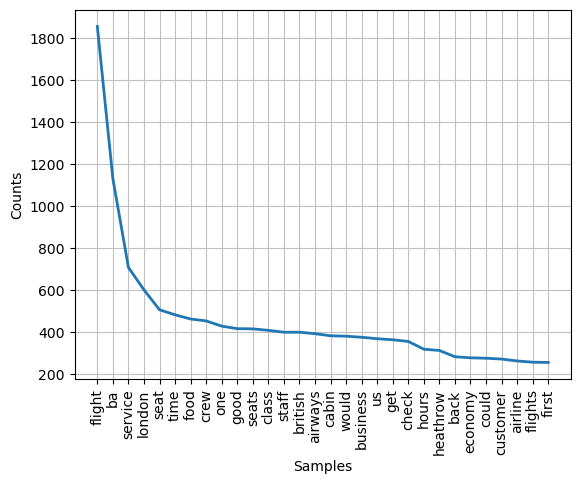

In [51]:
fdist.plot(30,cumulative=False)
plt.show()

In [52]:
df["Sentiment"].value_counts()

 1    535
 0    349
-1    116
Name: Sentiment, dtype: int64

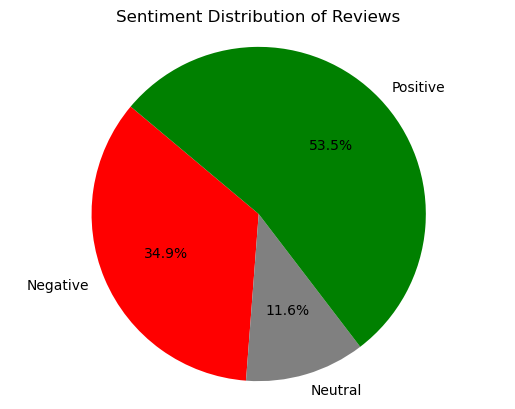

In [53]:
new_df = df[["Cleaned_Review", "Sentiment"]]

# Plot the pie chart to show the distribution of sentiments
sentiment_counts = new_df["Sentiment"].value_counts()
labels = ['Negative', 'Neutral', 'Positive']
sizes = [sentiment_counts[0], sentiment_counts[-1], sentiment_counts[1]]
colors = ['red', 'gray', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution of Reviews')
plt.show()



In [54]:
# Calculate the total percentage of positive, negative, and neutral reviews
total_reviews = len(new_df)
positive_percentage = (sentiment_counts[1] / total_reviews) * 100
negative_percentage = (sentiment_counts[0] / total_reviews) * 100
neutral_percentage = (sentiment_counts[-1] / total_reviews) * 100



In [55]:
print(f"Positive Reviews: {positive_percentage:.2f}%")
print(f"Negative Reviews: {negative_percentage:.2f}%")
print(f"Neutral Reviews: {neutral_percentage:.2f}%")

Positive Reviews: 53.50%
Negative Reviews: 34.90%
Neutral Reviews: 11.60%
